Successfully loaded my dataset from 'sales_data.csv'!

Looking at the first 5 rows of my data:
        Date   Product  Quantity Sold  Revenue ($)
0 2023-01-01    Laptop             10        12000
1 2023-01-01  Keyboard             50          750
2 2023-01-02   Monitor             15         3000
3 2023-01-02     Mouse            100          500
4 2023-01-03    Laptop              5         6000

Checking my dataset's information (data types and non-null counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           10 non-null     datetime64[ns]
 1   Product        10 non-null     object        
 2   Quantity Sold  10 non-null     int64         
 3   Revenue ($)    10 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 448.0+ bytes

Counting missing values per column:
Date        

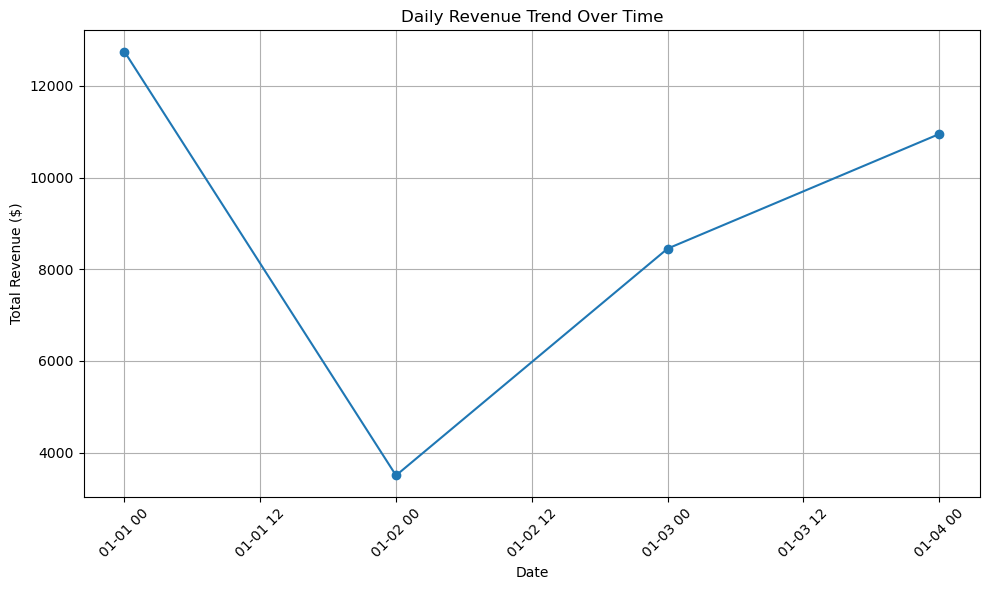

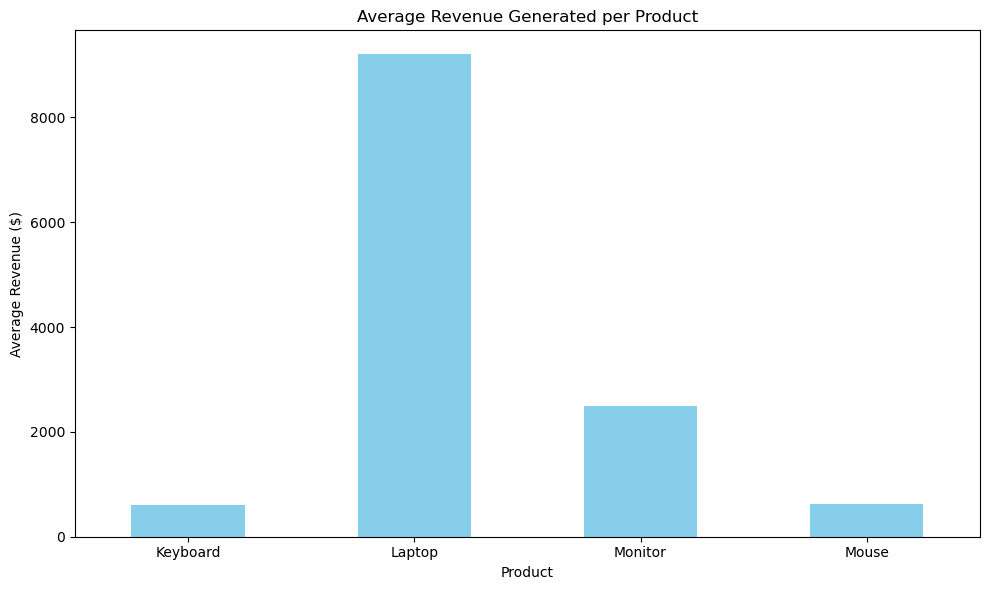

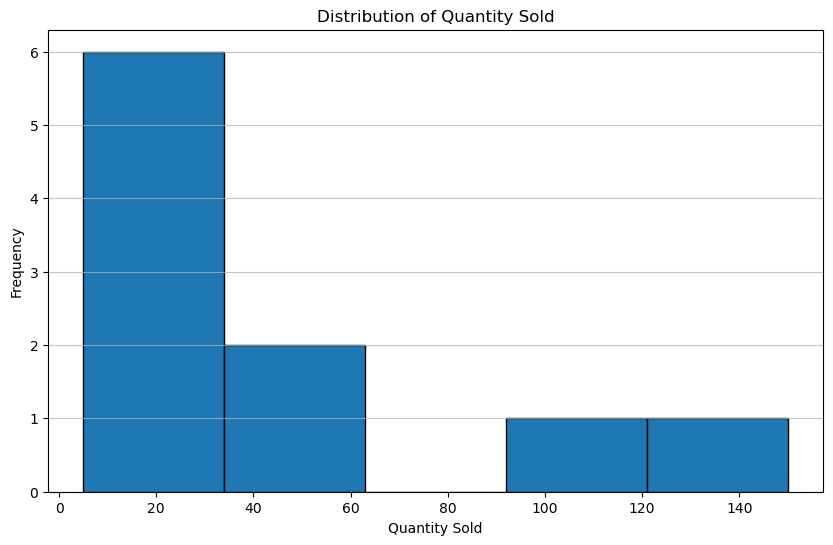

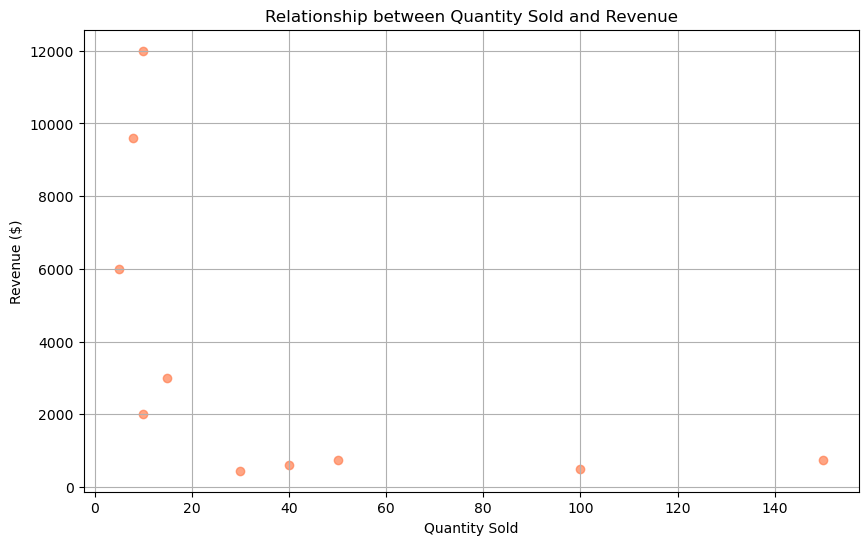


--- Task 3: Visualizations Generated ---
I've generated the four required plots. They should be displayed in my environment.


In [1]:
# --- Analysis and Visualization Assignment ---

# Objective: Load, analyze, and visualize a dataset using pandas and matplotlib.

# --- Task 1: Load and Explore the Dataset ---

import pandas as pd

# I also need matplotlib for plotting later, so I'll import it now too.I found out this after trying many times and compilling whole code at once.
import matplotlib.pyplot as plt

file_name = 'sales_data.csv' # Assuming my data is in a file named sales_data.csv


# I'll use a try-except block to handle potential errors, like if the file isn't found.
try:
    # pd.read_csv() reads the data. 

    sales_data = pd.read_csv(file_name, parse_dates=['Date'])
    print(f"Successfully loaded my dataset from '{file_name}'!") # Confirm loading

    # The assignment asks me to display the first few rows to inspect the data.
    print("\nLooking at the first 5 rows of my data:")
    print(sales_data.head()) # .head() shows the top 5 rows

    # Next, I need to explore the structure, check data types, and see if there are missing values.
    print("\nChecking my dataset's information (data types and non-null counts):")
    sales_data.info() # .info() gives a summary of the DataFrame

    # I also need to explicitly check for missing values in each column.
    print("\nCounting missing values per column:")
    print(sales_data.isnull().sum()) # .isnull() finds missing values, .sum() counts them per column

    # The assignment says to clean missing values. Based on the .info() and .isnull().sum()
    # output for this sales_data.csv, no missing values.
    # If there were, I would either drop rows with data.dropna(inplace=True)
    # or fill them, e.g., sales_data['NumericalColumn'].fillna(sales_data['NumericalColumn'].mean(), inplace=True).
    # Since there are none, I'll just note that cleaning wasn't needed for this specific file.
    print("\nData cleaning step: No missing values found in this dataset, so no cleaning was needed.")

except FileNotFoundError:
    print(f"Error: Couldn't find the file '{file_name}'. Make sure it's in the same folder as my script!")
    # If the file isn't there, I can't do the rest, so I'll exit.
    exit()
except Exception as e:
    print(f"An unexpected error occurred during data loading or exploration: {e}")
    # Exit on other errors too.
    exit()

# --- Task 2: Basic Data Analysis ---

print("\n--- Task 2: Basic Data Analysis ---")

# I need to compute basic statistics for numerical columns.

print("\nCalculating basic statistics for my numerical columns:")
print(sales_data.describe()) # Gives count, mean, std, min, max, quartiles

# The assignment also asks me to group data by a categorical column and compute a mean of a numerical column.
# I'll group by 'Product' and calculate the average 'Revenue ($)' for each product.
print("\nCalculating Average Revenue per Product:")
average_revenue_per_product = sales_data.groupby('Product')['Revenue ($)'].mean()
print(average_revenue_per_product) # Display the results

# I can also calculate the total quantity sold per product as another grouping example.
print("\nCalculating Total Quantity Sold per Product:")
total_quantity_per_product = sales_data.groupby('Product')['Quantity Sold'].sum()
print(total_quantity_per_product) # Display the results

# Finally for Task 2, I need to identify any patterns or interesting findings.
print("\n--- My Findings and Observations from Task 2 ---")
print(f"I found that there are {len(sales_data)} sales records in total.")
print(f"The average quantity sold across all products is about {sales_data['Quantity Sold'].mean():.2f}.")
print(f"The average revenue per sale transaction is around ${sales_data['Revenue ($)'].mean():,.2f}.")
# I can use idxmax() to easily find the product with the highest total sales quantity.
print(f"Based on total quantity sold, the best-selling product is '{total_quantity_per_product.idxmax()}' with {total_quantity_per_product.max()} units sold.")
# Similarly, I can find the product with the highest average revenue per sale.
print(f"Based on average revenue per sale, '{average_revenue_per_product.idxmax()}' brings in the highest average revenue (${average_revenue_per_product.max():,.2f}).")
print("-------------------------------------------------")


# --- Task 3: Data Visualization ---

print("\n--- Task 3: Data Visualization ---")

# I need to create at least four different types of visualizations using matplotlib.

# First, a Line chart showing trends over time.
# I'll group the data by 'Date' and sum the 'Revenue ($)' to get daily revenue.
daily_revenue_trend = sales_data.groupby('Date')['Revenue ($)'].sum()

plt.figure(figsize=(10, 6)) # Setting a good size for the plot
plt.plot(daily_revenue_trend.index, daily_revenue_trend.values, marker='o', linestyle='-') # Creating the line plot
plt.title('Daily Revenue Trend Over Time') # Adding a clear title
plt.xlabel('Date') # Labeling the x-axis
plt.ylabel('Total Revenue ($)') # Labeling the y-axis
plt.show() # Displaying the plot

# Second, a Bar chart comparing a numerical value across categories.
# I'll use the average revenue per product I calculated in Task 2.
plt.figure(figsize=(10, 6)) # Setting plot size
# Using the .plot(kind='bar') method directly on the pandas Series for convenience its a quick way to generate various types of plots instead of using matplotlib functions on every plot
average_revenue_per_product.plot(kind='bar', color='skyblue') # Creating the bar plot
plt.title('Average Revenue Generated per Product') # Adding a title
plt.xlabel('Product') # Labeling the x-axis
plt.ylabel('Average Revenue ($)') # Labeling the y-axis
plt.show() # Displaying the plot

# Third, a Histogram of a numerical column to show its distribution.
# I'll use the 'Quantity Sold' column.
plt.figure(figsize=(10, 6)) # Setting plot size
# Creating the histogram with a few bins and edge color for clarity
plt.hist(sales_data['Quantity Sold'], bins=5, edgecolor='black')
plt.title('Distribution of Quantity Sold') # Adding a title
plt.xlabel('Quantity Sold') # Labeling the x-axis
plt.ylabel('Frequency') # Labeling the y-axis
plt.grid(axis='y', alpha=0.75) # Adding a horizontal grid
plt.show() # Displaying the plot

# Fourth, a Scatter plot to visualize the relationship between two numerical columns.
# I'll plot 'Quantity Sold' against 'Revenue ($)' to see if there's a correlation.
plt.figure(figsize=(10, 6)) # Setting plot size
# Creating the scatter plot
plt.scatter(sales_data['Quantity Sold'], sales_data['Revenue ($)'], color='coral', alpha=0.7)
plt.title('Relationship between Quantity Sold and Revenue') # Adding a title
plt.xlabel('Quantity Sold') # Labeling the x-axis
plt.ylabel('Revenue ($)') # Labeling the y-axis
plt.grid(True) # Adding a grid
plt.show() # Displaying the plot

# Done with the visualizations!
print("\n--- Task 3: Visualizations Generated ---")
print("I've generated the four required plots. They should be displayed in my environment.")

# --- End of Assignment Code ---


Successfully loaded my dataset from 'sales_data.csv'!

Looking at the first 5 rows of my data:
        Date   Product  Quantity Sold  Revenue ($)
0 2023-01-01    Laptop             10        12000
1 2023-01-01  Keyboard             50          750
2 2023-01-02   Monitor             15         3000
3 2023-01-02     Mouse            100          500
4 2023-01-03    Laptop              5         6000

Checking my dataset's information (data types and non-null counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           10 non-null     datetime64[ns]
 1   Product        10 non-null     object        
 2   Quantity Sold  10 non-null     int64         
 3   Revenue ($)    10 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 448.0+ bytes

Counting missing values per column:
Date        

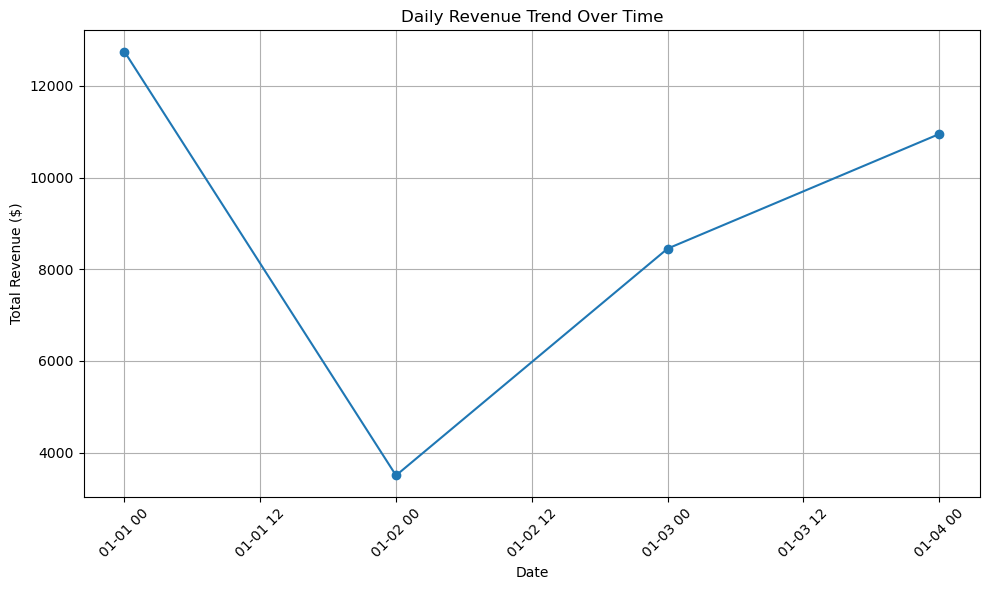

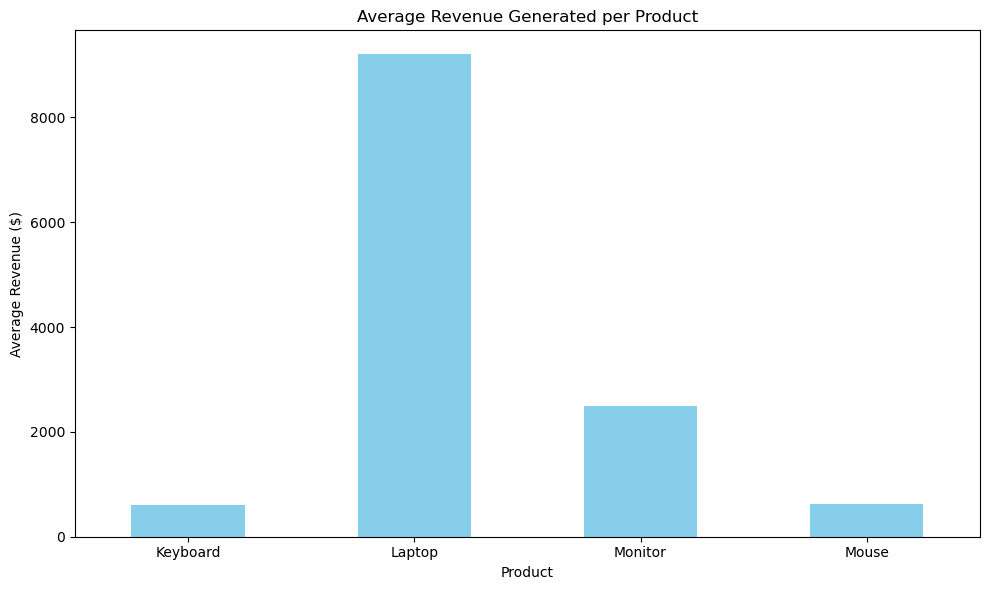

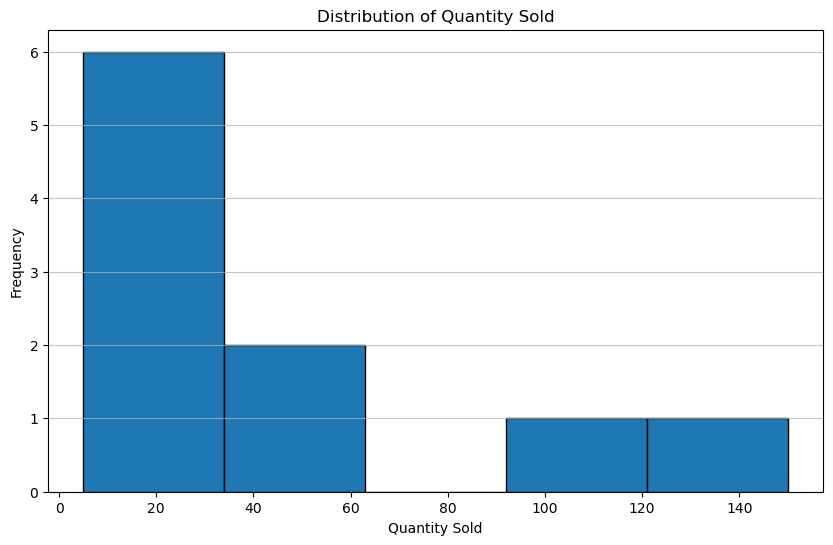

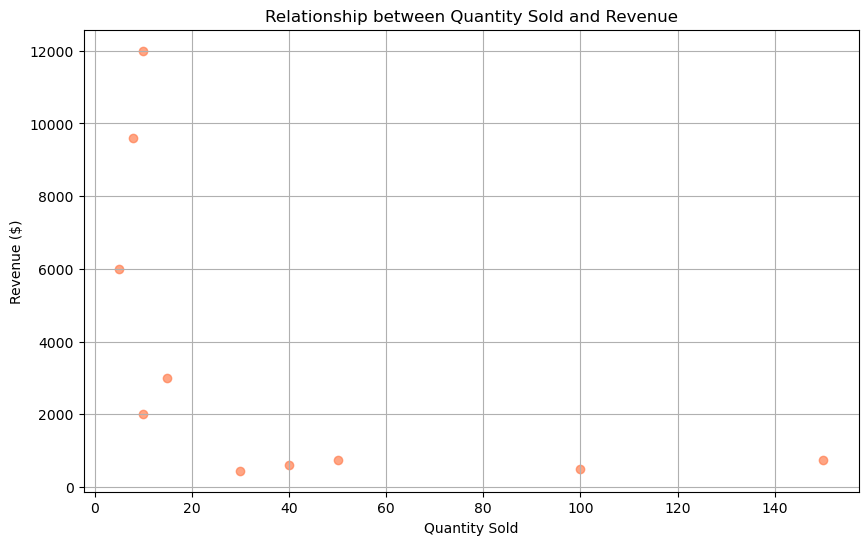


--- Task 3: Visualizations Generated ---
I've generated the four required plots. They should be displayed in my environment.


In [1]:
# --- Analysis and Visualization Assignment ---

# Objective: Load, analyze, and visualize a dataset using pandas and matplotlib.

# --- Task 1: Load and Explore the Dataset ---

import pandas as pd

# I also need matplotlib for plotting later, so I'll import it now too.I found out this after trying many times and compilling whole code at once.
import matplotlib.pyplot as plt

file_name = 'sales_data.csv' # Assuming my data is in a file named sales_data.csv


# I'll use a try-except block to handle potential errors, like if the file isn't found.
try:
    # pd.read_csv() reads the data. 

    sales_data = pd.read_csv(file_name, parse_dates=['Date'])
    print(f"Successfully loaded my dataset from '{file_name}'!") # Confirm loading

    # The assignment asks me to display the first few rows to inspect the data.
    print("\nLooking at the first 5 rows of my data:")
    print(sales_data.head()) # .head() shows the top 5 rows

    # Next, I need to explore the structure, check data types, and see if there are missing values.
    print("\nChecking my dataset's information (data types and non-null counts):")
    sales_data.info() # .info() gives a summary of the DataFrame

    # I also need to explicitly check for missing values in each column.
    print("\nCounting missing values per column:")
    print(sales_data.isnull().sum()) # .isnull() finds missing values, .sum() counts them per column

    # The assignment says to clean missing values. Based on the .info() and .isnull().sum()
    # output for this sales_data.csv, no missing values.
    # If there were, I would either drop rows with data.dropna(inplace=True)
    # or fill them, e.g., sales_data['NumericalColumn'].fillna(sales_data['NumericalColumn'].mean(), inplace=True).
    # Since there are none, I'll just note that cleaning wasn't needed for this specific file.
    print("\nData cleaning step: No missing values found in this dataset, so no cleaning was needed.")

except FileNotFoundError:
    print(f"Error: Couldn't find the file '{file_name}'. Make sure it's in the same folder as my script!")
    # If the file isn't there, I can't do the rest, so I'll exit.
    exit()
except Exception as e:
    print(f"An unexpected error occurred during data loading or exploration: {e}")
    # Exit on other errors too.
    exit()

# --- Task 2: Basic Data Analysis ---

print("\n--- Task 2: Basic Data Analysis ---")

# I need to compute basic statistics for numerical columns.

print("\nCalculating basic statistics for my numerical columns:")
print(sales_data.describe()) # Gives count, mean, std, min, max, quartiles

# The assignment also asks me to group data by a categorical column and compute a mean of a numerical column.
# I'll group by 'Product' and calculate the average 'Revenue ($)' for each product.
print("\nCalculating Average Revenue per Product:")
average_revenue_per_product = sales_data.groupby('Product')['Revenue ($)'].mean()
print(average_revenue_per_product) # Display the results

# I can also calculate the total quantity sold per product as another grouping example.
print("\nCalculating Total Quantity Sold per Product:")
total_quantity_per_product = sales_data.groupby('Product')['Quantity Sold'].sum()
print(total_quantity_per_product) # Display the results

# Finally for Task 2, I need to identify any patterns or interesting findings.
print("\n--- My Findings and Observations from Task 2 ---")
print(f"I found that there are {len(sales_data)} sales records in total.")
print(f"The average quantity sold across all products is about {sales_data['Quantity Sold'].mean():.2f}.")
print(f"The average revenue per sale transaction is around ${sales_data['Revenue ($)'].mean():,.2f}.")
# I can use idxmax() to easily find the product with the highest total sales quantity.
print(f"Based on total quantity sold, the best-selling product is '{total_quantity_per_product.idxmax()}' with {total_quantity_per_product.max()} units sold.")
# Similarly, I can find the product with the highest average revenue per sale.
print(f"Based on average revenue per sale, '{average_revenue_per_product.idxmax()}' brings in the highest average revenue (${average_revenue_per_product.max():,.2f}).")
print("-------------------------------------------------")


# --- Task 3: Data Visualization ---

print("\n--- Task 3: Data Visualization ---")

# I need to create at least four different types of visualizations using matplotlib.

# First, a Line chart showing trends over time.
# I'll group the data by 'Date' and sum the 'Revenue ($)' to get daily revenue.
daily_revenue_trend = sales_data.groupby('Date')['Revenue ($)'].sum()

plt.figure(figsize=(10, 6)) # Setting a good size for the plot
plt.plot(daily_revenue_trend.index, daily_revenue_trend.values, marker='o', linestyle='-') # Creating the line plot
plt.title('Daily Revenue Trend Over Time') # Adding a clear title
plt.xlabel('Date') # Labeling the x-axis
plt.ylabel('Total Revenue ($)') # Labeling the y-axis
plt.show() # Displaying the plot

# Second, a Bar chart comparing a numerical value across categories.
# I'll use the average revenue per product I calculated in Task 2.
plt.figure(figsize=(10, 6)) # Setting plot size
# Using the .plot(kind='bar') method directly on the pandas Series for convenience its a quick way to generate various types of plots instead of using matplotlib functions on every plot
average_revenue_per_product.plot(kind='bar', color='skyblue') # Creating the bar plot
plt.title('Average Revenue Generated per Product') # Adding a title
plt.xlabel('Product') # Labeling the x-axis
plt.ylabel('Average Revenue ($)') # Labeling the y-axis
plt.show() # Displaying the plot

# Third, a Histogram of a numerical column to show its distribution.
# I'll use the 'Quantity Sold' column.
plt.figure(figsize=(10, 6)) # Setting plot size
# Creating the histogram with a few bins and edge color for clarity
plt.hist(sales_data['Quantity Sold'], bins=5, edgecolor='black')
plt.title('Distribution of Quantity Sold') # Adding a title
plt.xlabel('Quantity Sold') # Labeling the x-axis
plt.ylabel('Frequency') # Labeling the y-axis
plt.grid(axis='y', alpha=0.75) # Adding a horizontal grid
plt.show() # Displaying the plot

# Fourth, a Scatter plot to visualize the relationship between two numerical columns.
# I'll plot 'Quantity Sold' against 'Revenue ($)' to see if there's a correlation.
plt.figure(figsize=(10, 6)) # Setting plot size
# Creating the scatter plot
plt.scatter(sales_data['Quantity Sold'], sales_data['Revenue ($)'], color='coral', alpha=0.7)
plt.title('Relationship between Quantity Sold and Revenue') # Adding a title
plt.xlabel('Quantity Sold') # Labeling the x-axis
plt.ylabel('Revenue ($)') # Labeling the y-axis
plt.grid(True) # Adding a grid
plt.show() # Displaying the plot

# Done with the visualizations!
print("\n--- Task 3: Visualizations Generated ---")
print("I've generated the four required plots. They should be displayed in my environment.")

# --- End of Assignment Code ---
